In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

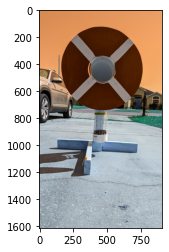

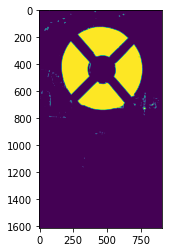

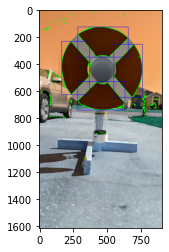

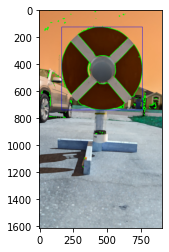

: 

In [41]:
bounding_box = ((0,0),(0,0))

frame = cv2.imread(r'C:\Users\herbi\Documents\SeaGrant\AllSeaingVehicle\notebooks\water_gun.jpg')
plt.imshow(frame)
# Taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)
img_erosion = cv2.erode(frame, kernel, iterations=1)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=2)
frame = img_dilation
#Convert BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# Blue color boundaries
lower_bound = np.array([108,150,0])
upper_bound = np.array([140,255,255])

mask = cv2.inRange(hsv,lower_bound,upper_bound)
plt.figure()
plt.imshow(mask)
# image_print(mask)
bounding_box = ((0,0),(0,0))

contours,_ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
bounding_boxes = []
for contour in contours:
    # c = max(contours, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(contour)
    if w > 40 and h > 40:
        bounding_boxes.append(((x,y),(x+w,y+h)))
cv2.drawContours(frame, contours, -1, (0,255,0), 3)
min_x = np.inf
max_x = -np.inf
min_y = np.inf
max_y = -np.inf
for bounding_box in bounding_boxes:
    x,y = bounding_box[0]
    w,h = bounding_box[1][0] - x, bounding_box[1][1] - y
    min_x = min(min_x, x)
    max_x = max(max_x, x+w)
    min_y = min(min_y, y)
    max_y = max(max_y, y+h)
    # cv2.rectangle(frame, bounding_box[0], bounding_box[1], (0,0,255), 2)
cv2.rectangle(frame, (min_x, min_y), (max_x, max_y), (0,0,255), 2)
# plt.figure()
# plt.imshow(frame)
# plt.figure()
# plt.imshow(game_frame)

In [ ]:
)